## PROBLEM STATEMENT:

 - Finding out the correlation between ACT and SAT participation rate in  2017.




* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State


In [3]:
# Code: To calculate mean

def my_mean(my_list):
    count=len(my_list)
    total=sum([num for num in my_list])
    return total/count
    
my_mean([1,2,3])

2.0

In [4]:
# Code: To calculate sd
def sd(my_list):
    mean=my_mean(my_list)
    total=sum([((num-mean) ** 2)for num in my_list])
    return ((total/len(my_list)) ** .5)
        
        
    
sd([2,4,6])

1.632993161855452

In [6]:
# Code: To convert per into float
def per_float(string):
       return float(string[:-1])/100

per_float('30.5%')

0.305

In [7]:
# Imports Python Lib:
   # Pandas for Analysing Tabular data
   # Numpy to perform Mathematical operation
   # Seaborn and Matplotlib for Vizz
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

In [8]:
# To read csv file from Pandas

sat_2017=pd.read_csv('../data/sat_2017.csv')
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [9]:
# To read csv file from Pandas

act_2017=pd.read_csv('../data/act_2017.csv')
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [10]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [12]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [13]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


## Data Cleaning:

- change Datatypes in all dataset.
- change percentage into floating number in all dataset.
- drop extra raw in ACT data set.
- change some datas to make get more accuracy.

In [14]:
#checking
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [15]:
#changing percentage into floating number by applying functions

sat_2017['Participation']=sat_2017['Participation'].apply(lambda x : per_float(x))

In [16]:
#checking changes made in participation column
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [17]:
#checking
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [18]:
#changing State datatype from object to string

sat_2017['State']=sat_2017['State'].astype('string')

The datatype of the state column was an object datatype instead of an string.

In [19]:
# checking datattype for SAT dataset

sat_2017.dtypes

State                                  string
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [20]:
#checking
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [21]:
#changing State datatype from object to string
act_2017['State']=act_2017['State'].astype('string')

In [22]:
#changing percentage into floating number by applying functions

act_2017['Participation']=act_2017['Participation'].apply(lambda x : per_float(x))

In [23]:
act_2017.dtypes

State             string
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [24]:
#since showing errors while tying to use lambda function,we need to check values.
act_2017['Composite'].value_counts()

20.3     3
19.8     3
21.4     3
24.1     2
21.8     2
21.9     2
20.4     2
24.2     2
23.6     2
19.4     2
19.7     2
20.7     1
23.8     1
20.5     1
24.0     1
23.7     1
22.0     1
19.1     1
23.9     1
25.5     1
17.8     1
18.7     1
21.0     1
18.6     1
21.5     1
25.4     1
19.2     1
24.3     1
19.5     1
20.0     1
21.7     1
22.6     1
22.3     1
19.0     1
25.2     1
20.8     1
22.8     1
20.2x    1
Name: Composite, dtype: int64

In [25]:
#since 1 raw contain an 20.2x,replacing it with 20.2

In [26]:
act_2017['Composite']=act_2017['Composite'].apply(lambda x : '20.2' if x=='20.2x' else x)

In [27]:
#checking
act_2017['Composite']

0     21.0
1     19.2
2     19.8
3     19.7
4     19.4
5     22.8
6     20.8
7     25.2
8     24.1
9     24.2
10    19.8
11    21.4
12    19.0
13    22.3
14    21.4
15    22.6
16    21.9
17    21.7
18    20.0
19    19.5
20    24.3
21    23.6
22    25.4
23    24.1
24    21.5
25    18.6
26    20.4
27    20.3
28    21.4
29    17.8
30    25.5
31    23.9
32    19.7
33    24.2
34    19.1
35    20.3
36    22.0
37    19.4
38    21.8
39    23.7
40    24.0
41    18.7
42    21.8
43    19.8
44    20.7
45    20.3
46    23.6
47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: object

now,converting composite datatype from object to float

In [28]:

act_2017['Composite']=act_2017['Composite'].astype('float')

In [29]:
#checking
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     string 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), string(1)
memory usage: 3.0 KB


In [30]:
act_2017[act_2017['State']== 'National']

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


so we need to drop extra row for national average

In [31]:
#droping one rows
act_2017.drop(index=0,axis=0,inplace=True)

In [32]:
#checking
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     string 
 1   Participation  51 non-null     float64
 2   English        51 non-null     float64
 3   Math           51 non-null     float64
 4   Reading        51 non-null     float64
 5   Science        51 non-null     float64
 6   Composite      51 non-null     float64
dtypes: float64(6), string(1)
memory usage: 2.9 KB


In [33]:
sat_2017.describe()


,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039
std,0.352766,45.666901,84.909119,92.494812
min,0.020000,482.000000,52.000000,950.000000
25%,0.040000,533.500000,522.000000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


minimum SAT score is 400.replacing 52 with 520.

In [34]:
sat_2017['Math']=sat_2017['Math'].apply(lambda x : 520 if x==52 else x)

In [35]:
#checking
sat_2017['Math'].value_counts()

553    2
524    2
551    2
520    2
604    2
541    2
572    1
570    1
625    1
526    1
561    1
523    1
535    1
621    1
531    1
517    1
548    1
631    1
521    1
603    1
507    1
614    1
534    1
528    1
591    1
495    1
607    1
493    1
594    1
595    1
512    1
492    1
468    1
497    1
515    1
556    1
651    1
532    1
635    1
628    1
616    1
586    1
499    1
533    1
649    1
Name: Math, dtype: int64

In [36]:
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [37]:
#minimum science is 2.3,converting into 23

act_2017['Science']=act_2017['Science'].apply(lambda x : 23 if x==2.3 else x)

In [38]:
#checking

act_2017['Science'].value_counts()

20.5    3
22.0    3
20.9    3
20.6    3
22.1    2
19.9    2
19.6    2
23.2    2
21.7    2
19.4    2
21.3    2
23.5    2
19.3    2
18.8    1
20.0    1
23.9    1
23.3    1
24.9    1
23.4    1
18.2    1
21.5    1
23.0    1
21.6    1
23.8    1
24.7    1
23.7    1
20.1    1
22.3    1
23.6    1
24.6    1
22.2    1
19.5    1
19.8    1
18.9    1
Name: Science, dtype: int64

renaming columns using dict:

In [39]:
sat_2017.rename(columns= {'State' : 'state',
                          'Participation' : 'sat_part', 
                          'Evidence-Based Reading and Writing' :'sat_erw',
                          'Math' : 'sat_math',
                          'Total' : 'sat_total'
                         },inplace=True
    )

In [40]:
act_2017.rename(columns= {'State' : 'state',
                          'Participation' : 'act_part', 
                          'English' :'act_eng',
                          'Math' : 'act_math',
                          'Reading' : 'act_read',
                          'Science' : 'act_sci',
                          'Composite' : 'act_comp'
                         },inplace=True
    )

In [41]:
sat_2017.columns

Index(['state', 'sat_part', 'sat_erw', 'sat_math', 'sat_total'], dtype='object')

In [42]:
act_2017.columns

Index(['state', 'act_part', 'act_eng', 'act_math', 'act_read', 'act_sci',
       'act_comp'],
      dtype='object')

Merging sat_2017 and act_2017

In [43]:
merged_2017=sat_2017.merge(act_2017,on='state')

In [44]:
#checking
merged_2017.head()

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [45]:
merged_2017.shape

(51, 11)

In [46]:
#saving merged_data files as csv into data folder
merged_2017.to_csv('../data/merged_2017')

### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|string|SAT2017,ACT2017  |State from which ACT & SAT datas was collected|
|sat_part|float|SAT2017|Participation rate in SAT 2017|
|sat_math|integer|SAT2017|Average math mark scored in SAT 2017|
|sat_total|integer|SAT2017|Average total mark scored in SAT 2017|
|sat_erw|integer|SAT2017|Average Evidence BAsed read and write mark scored in SAT 2017|
|act_part|float|ACT2017|Participation rate in ACT 2017|
|act_eng|float|ACT2017|Average english mark scored in ACT 2017|
|act_math|float|ACT2017|Average math mark scored in ACT 2017|
|act_read|float|ACT2017|Average Evidence BAsed read and write mark scored in ACT 2017|
|act_sci|float|ACT2017|Average Science scored in ACT 2017|
|act_comp|float|ACT2017|Average composite scored in ACT 2017|







## Summary Statistics

In [47]:
merged_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part,51.0,0.398039,0.352766,0.02,0.04,0.38,0.66,1.0
sat_erw,51.0,569.117647,45.666901,482.00,533.50,559.00,613.00,644.0
sat_math,51.0,556.803922,47.180513,468.00,522.00,548.00,599.00,651.0
sat_total,51.0,1126.098039,92.494812,950.00,1055.50,1107.00,1212.00,1295.0
act_part,51.0,0.652549,0.321408,0.08,0.31,0.69,1.00,1.0
act_eng,51.0,20.931373,2.353677,16.30,19.00,20.70,23.30,25.5
act_math,51.0,21.182353,1.981989,18.00,19.40,20.90,23.10,25.3
act_read,51.0,22.013725,2.067271,18.10,20.45,21.80,24.15,26.0
act_sci,51.0,21.447059,1.735552,18.20,19.95,21.30,23.10,24.9
act_comp,51.0,21.519608,2.020695,17.80,19.80,21.40,23.60,25.5


In [48]:
#states with max participation for sat 2017.

merged_2017.sort_values('sat_part',ascending=False).head(5)

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5


District of Columbia,Michigan,Connecticut,Delaware are the states with 100% participation.

In [49]:
#states with max participation for act 2017.

merged_2017.sort_values('act_part',ascending=False).head(20)

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
17,Kentucky,0.04,631,616,1247,1.00,19.6,19.4,20.5,20.1,20.0
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3
42,Tennessee,0.05,623,604,1228,1.00,19.5,19.2,20.1,19.9,19.8
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,18.7
36,Oklahoma,0.07,530,517,1047,1.00,18.5,18.8,20.1,19.6,19.4
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8
26,Montana,0.10,605,591,1196,1.00,19.0,20.2,21.0,20.5,20.3


Alabama,Kentucky,Wisconsin,Utah,Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas are the states with 100% participation.

As per data for the year 2017,more states  with 100% participated in ACT.

In [50]:
#states with min participation for sat 2017.

merged_2017.sort_values('sat_part').head()

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3


North Dakota,Mississippi,Iowa,Missouri,Utah are the states with low participation rate.
 

Interstingly,these states have max(~100%) participation in ACT 2017.
* In these states,more students prefer ACT over SAT.

In [51]:
#states with min participation for act 2017.

merged_2017.sort_values('act_part').head()

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7


Maine,New Hampshire,Delaware are the states with minumum participation rate.

 * The minimum participation rate was 8% in ACT and 2% in SAT.

In [52]:
#finding highest SAT score in 2017

merged_2017.sort_values('sat_total',ascending=False).head(5)

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,21.7


Out of 3% participation rate in states like Minnesota & Wisconsin,highest score acheived is greater than 1290.These states are ACT dominant states with 100% participation.


In [53]:
#finding lowest SAT score in 2017

merged_2017.sort_values('sat_total').head(5)

,state,sat_part,sat_erw,sat_math,sat_total,act_part,act_eng,act_math,act_read,act_sci,act_comp
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3


States with max participation rate have least sat total score.
no correlation between participation rate and total mark scored.

In [54]:
#finding highest ACT score in 2017
merged_2017[['act_part','act_comp']].sort_values('act_comp',ascending=False).head(5)

,act_part,act_comp
29,0.18,25.5
21,0.29,25.4
6,0.31,25.2
19,0.08,24.3
8,0.32,24.2


In [55]:
#finding lowest ACT score in 2017

merged_2017[['act_part','act_comp']].sort_values('act_comp').head(5)

,act_part,act_comp
28,1.0,17.8
24,1.0,18.6
40,1.0,18.7
11,0.9,19.0
33,1.0,19.1


States with max participation rate do have least act total score.

 ### DATA VISUALISATION

In [56]:
#heatmap
corr=merged_2017.corr()


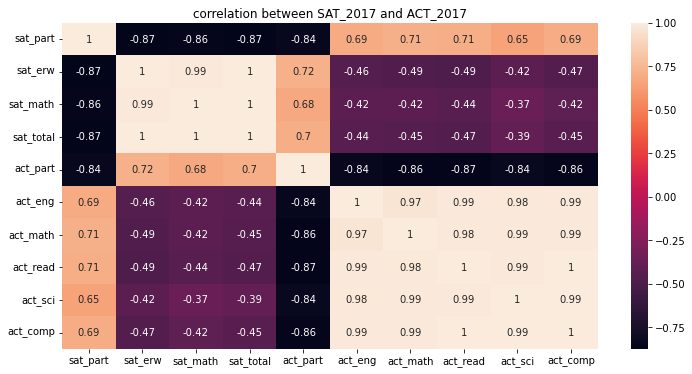

In [57]:
plt.figure(figsize=(12,6))
plt.title('correlation between SAT_2017 and ACT_2017')
sns.heatmap(corr,annot=True);

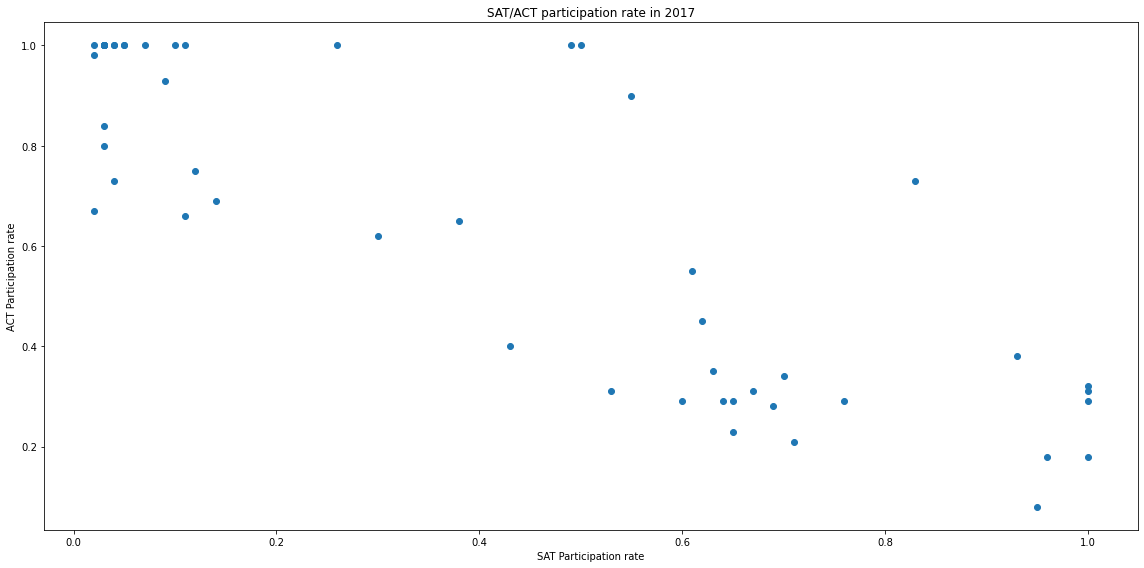

In [58]:
#plotting scatter plot to find relation between SAT AND ACT participation.

plt.figure(figsize=(16,8))
plt.title('SAT/ACT participation rate in 2017')
plt.xlabel('SAT Participation rate')
plt.ylabel('ACT Participation rate')

plt.scatter(merged_2017['sat_part'],merged_2017['act_part'])

#save image to computer:
plt.tight_layout()
plt.savefig('../data/SAT_ACT_PART.png')

ACT participation rate is more than SAT participation.
Low negatively correlated.

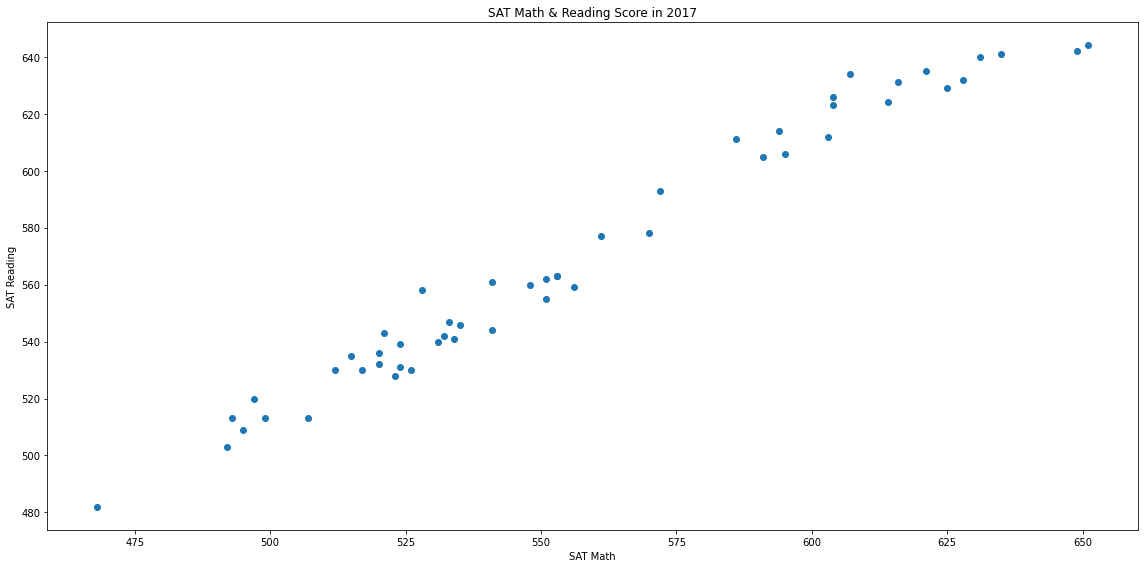

In [59]:
#plotting scatter plot to find relation between Math and Read in SAT-2017.

plt.figure(figsize=(16,8))
plt.title('SAT Math & Reading Score in 2017')
plt.xlabel('SAT Math')
plt.ylabel('SAT Reading')

plt.scatter(merged_2017['sat_math'],merged_2017['sat_erw'])


#save image to computer:
plt.tight_layout()
plt.savefig('../data/SAT_MATH_READ.png')

Positively correlated.
Students with high math score relatively achieved high reading/writing score. 

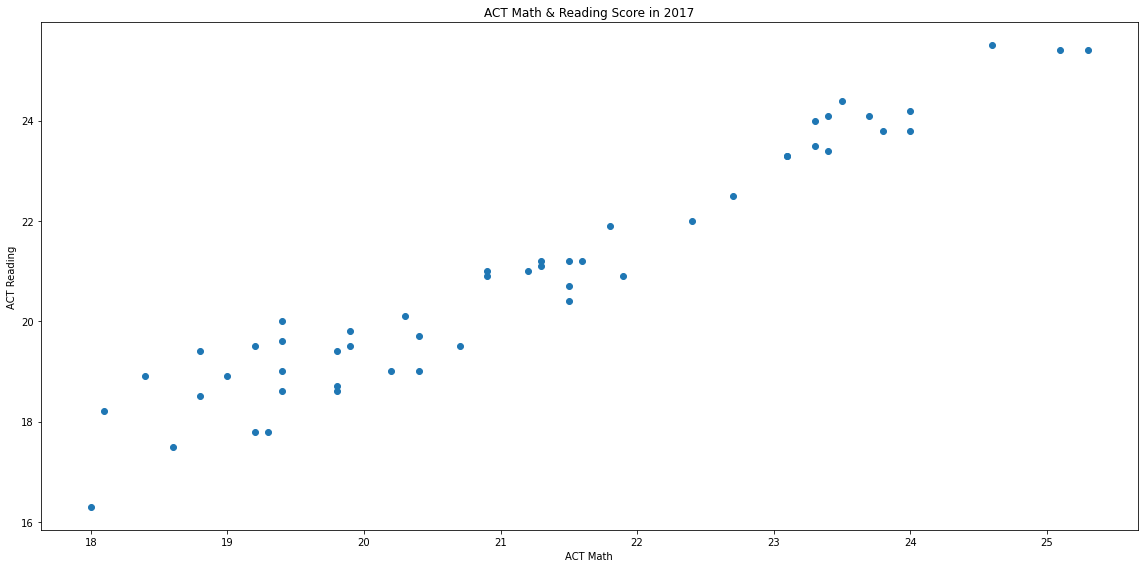

In [60]:
#plotting scatter plot to find relation between Math and Read in ACT.


plt.figure(figsize=(16,8))
plt.title('ACT Math & Reading Score in 2017')
plt.xlabel('ACT Math')
plt.ylabel('ACT Reading')

plt.scatter(merged_2017['act_math'],merged_2017['act_eng'])

#save image to computer:
plt.tight_layout()
plt.savefig('../data/ACT_MATH_READ.png')

Positively correlated.Students with high math score relatively achieved high reading/writing score.

## Conclusions:

* more states prefered ACT over SAT.
* 17 states with max 100% participation in ACT.
* 4 states with max 100% participation in SAT.
* The minimum participation rate was 8% in ACT and 2% in SAT.

## Recommendations:

* I recommend that the authorities should focus to raise SAT participation rates.
* Some states have low participation rate in both ACT and SAT,authorities should focus on 
  these states to make 100% participation rate.Reducing exam fees or making it free of       cost may be a good step to increase participation.    
* Authorities may check student's background who scored low total score to ensure giving   them more necessary support.


